In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

### Step 1: Fetching data

In [2]:
dataframe = pd.read_csv("jena_climate_2009_2016.csv")
dataframe.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


### Preprocessing Data

In [3]:
dataframe.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


In [4]:
dataframe = dataframe.drop(['p (mbar)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'], axis=1)

In [5]:
dataframe = dataframe[::6]

In [6]:
dataframe.head()

,Date Time,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3)
0,01.01.2009 00:10:00,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75
6,01.01.2009 01:10:00,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68
12,01.01.2009 02:10:00,-8.85,264.57,-9.70,93.5,3.12,2.92,0.20,1.82,2.93,1312.11
18,01.01.2009 03:10:00,-8.84,264.56,-9.69,93.5,3.13,2.92,0.20,1.83,2.93,1312.37
24,01.01.2009 04:10:00,-9.23,264.15,-10.25,92.2,3.03,2.79,0.24,1.74,2.80,1314.62


In [7]:
len(dataframe)

70092

### Normalizing Data

In [8]:
def normalize(dataframe):
    mean = dataframe.mean()
    std  = dataframe.std()
    return (dataframe - mean) / std

In [9]:
dataframe = dataframe.drop(['Date Time'], axis=1)
dataframe = normalize(dataframe)

In [10]:
dataframe.head()

,T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3)
0,-2.073903,-2.127340,-2.058629,1.049590,-1.323890,-1.535318,-0.780538,-1.537024,-1.539518,2.293528
6,-2.026419,-2.079133,-1.969480,1.140622,-1.309677,-1.499464,-0.788704,-1.499371,-1.504098,2.241748
12,-2.172433,-2.224930,-2.177493,1.061727,-1.351022,-1.580732,-0.784621,-1.582207,-1.584383,2.402592
18,-2.171245,-2.226106,-2.176007,1.061727,-1.349730,-1.580732,-0.784621,-1.578442,-1.584383,2.409096
24,-2.217543,-2.274314,-2.259213,0.982833,-1.362651,-1.611805,-0.776455,-1.612330,-1.615081,2.465379


### Create train/dev/test sets

In [11]:
train_perc = 0.75
train_len  = int(len(dataframe)*0.75)

train_df = dataframe[:train_len-1]
val_df   = dataframe[train_len:]

In [12]:
len(train_df)

52568

In [13]:
len(val_df)

17523

In [14]:
def window(data, window_size, offset):
    data_array = data.to_numpy()

    x_train = []
    y_train = []

    for i in range(len(data)-(window_size+1+offset)):
        x_train.append(data_array[i:i+window_size])
        y_train.append(data_array[i+window_size+offset][0])
        
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    y_train.reshape(-1, 1)
    
    return x_train, y_train


In [15]:
train_ds = window(train_df, 24, 1)
train_ds[0].shape

(52542, 24, 10)

In [16]:
val_ds = window(val_df, 24, 1)
val_ds[0].shape

(17497, 24, 10)

### Creating the model

In [17]:
inputs = keras.layers.Input(shape=(train_ds[0].shape[1], train_ds[0].shape[2]))
lstm_layer = keras.layers.LSTM(32)(inputs)
output = keras.layers.Dense(1)(lstm_layer)

model = keras.Model(inputs, output)
model.compile(keras.optimizers.Adam(0.001), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 10)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5504      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x=train_ds[0], y=train_ds[1], epochs=5, validation_data=val_ds)

Epoch 1/5
1642/1642 [==============================] - 11s 6ms/step - loss: 0.0414 - val_loss: 0.0226
Epoch 2/5
1642/1642 [==============================] - 9s 5ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 3/5
1642/1642 [==============================] - 9s 5ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 4/5
1642/1642 [==============================] - 9s 5ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 5/5
1642/1642 [==============================] - 9s 5ms/step - loss: 0.0182 - val_loss: 0.0183


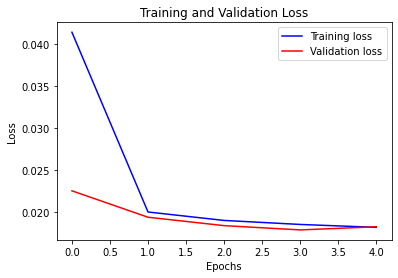

In [19]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [25]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


#for x, y in dataset_val:
#    show_plot(
#        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
#        12,
#        "Single Step Prediction",
#    )


In [27]:
x, y = val_ds

y_pred = model.predict(x)

y_pred.shape

(17497, 1)

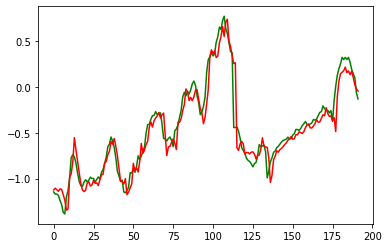

In [32]:
fig, ax = plt.subplots()

i = 150

ax.plot(y[i:i+96*2], c='g')
ax.plot(y_pred[i:i+96*2,0], c='r')